In [1]:
from pickle import load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
src, configs, n_params_, losses_accs_ = load(open('train_projection=full_epochs=100_lr=5e-4_sess=5', 'rb'))

In [3]:
losses_accs_df = list(map(lambda x: pd.DataFrame(x), losses_accs_))

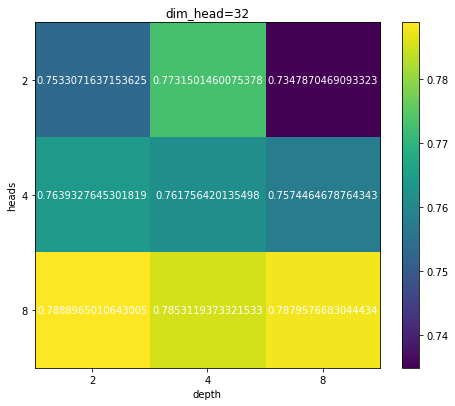

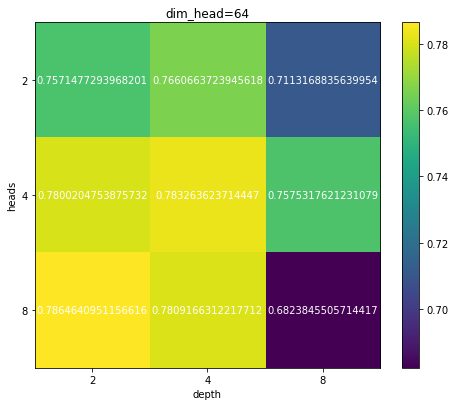

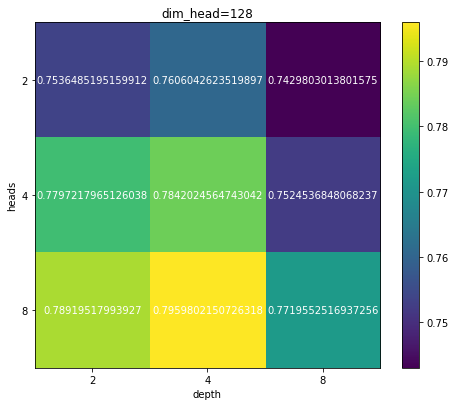

In [4]:
heads = [2, 4, 8]
depth = [2, 4, 8,]

for dim_head in [32, 64, 128]:

    scores = np.empty((3,3))
    for i, config in enumerate(configs):
        if config['dim_head'] == dim_head:
            scores[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].val_acc.max()

    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', )#cmap=plt.cm.hot)
    plt.ylabel('heads')
    plt.xlabel('depth')
    plt.colorbar()
    plt.xticks(np.arange(len(heads)), heads)
    plt.yticks(np.arange(len(depth)), depth)
    plt.title(f'dim_head={dim_head}')
    for i in range(len(heads)):
        for j in range(len(depth)):
            text = plt.text(j, i, scores[i, j],
                           ha="center", va="center", color="w")
    plt.show()

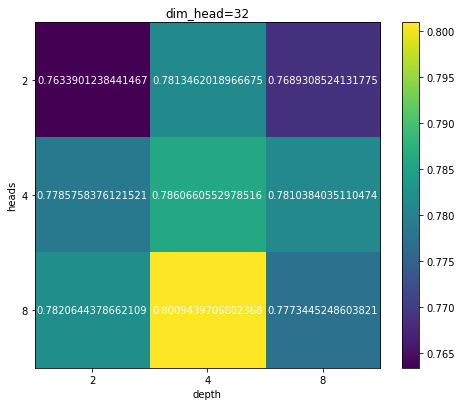

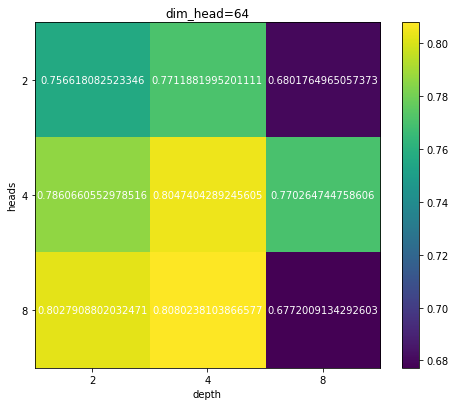

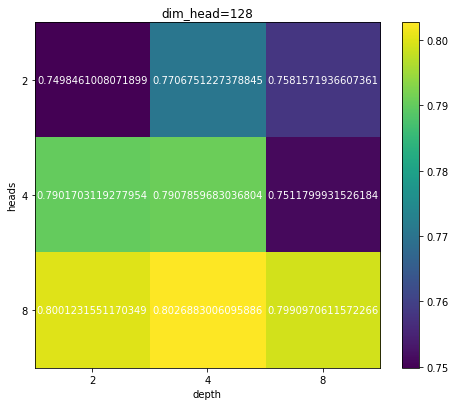

In [5]:
heads = [2, 4, 8]
depth = [2, 4, 8,]

for dim_head in [32, 64, 128]:

    scores = np.empty((3,3))
    for i, config in enumerate(configs):
        if config['dim_head'] == dim_head:
            scores[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].test_acc[losses_accs_df[i].val_acc.argmax()]

    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', )#cmap=plt.cm.hot)
    plt.ylabel('heads')
    plt.xlabel('depth')
    plt.colorbar()
    plt.xticks(np.arange(len(heads)), heads)
    plt.yticks(np.arange(len(depth)), depth)
    plt.title(f'dim_head={dim_head}')
    for i in range(len(heads)):
        for j in range(len(depth)):
            text = plt.text(j, i, scores[i, j],
                           ha="center", va="center", color="w")
    plt.show()